Exploratory Data Analysis (EDA) for Animal Classification

This script is designed to analyze the dataset, which should have been split 
into training (train) and validation (val) sets using the 'split_dataset.py' utility.

1. Setup and Statistics Collection
We import necessary libraries and determine the root data directory.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random 
from PIL import Image

# --- FINAL PATH FIX (UNIVERSAL METHOD) ---
# This method determines the absolute path to the 'dataset' folder, 
# even if the script is run from a subfolder or another location.

# 1. Determine the current working directory
current_dir = os.getcwd() 

# 2. Check if we are already inside 'task 2'
if current_dir.endswith('task 2') or current_dir.endswith('task 2/'):
    BASE_PROJECT_DIR = current_dir
else:
    # Assume 'task 2' is a subfolder of the current directory (e.g., Internship)
    BASE_PROJECT_DIR = os.path.join(current_dir, 'task 2')

# 3. Form the final path to the data
DATA_DIR = os.path.join(BASE_PROJECT_DIR, 'dataset')
# --------------------------------------------------------

print(f"Python working directory: {current_dir}")
print(f"Attempting to find data in: {DATA_DIR}")

def collect_stats(data_dir):
    """Collects the number of images for each class in the train and val sets."""
    stats = {'class_name': [], 'train_count': [], 'val_count': []}
    
    # Use join for correct construction of train/val paths
    train_path = os.path.join(data_dir, 'train')
    val_path = os.path.join(data_dir, 'val')
    
    if not os.path.exists(train_path) or not os.path.exists(val_path):
        print("\n" + "="*80)
        print("ERROR: DATA FOLDERS NOT FOUND!")
        print("Check the structure: there must be a 'dataset' folder with 'train' and 'val' inside.")
        print(f"Path to train: {train_path} (Exists: {os.path.exists(train_path)})")
        print(f"Path to val: {val_path} (Exists: {os.path.exists(val_path)})")
        print("="*80 + "\n")
        return None

    # Get the list of classes from the train folder
    try:
        class_dirs = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
    except FileNotFoundError:
        print(f"Critical Error: Cannot read contents of folder {train_path}")
        return None
        
    for class_name in sorted(class_dirs):
        # Count files in the train class folder
        train_count = len(os.listdir(os.path.join(train_path, class_name)))
        
        # Count files in the val class folder (handle missing val folder gracefully)
        val_class_path = os.path.join(val_path, class_name)
        val_count = len(os.listdir(val_class_path)) if os.path.exists(val_class_path) else 0

        stats['class_name'].append(class_name)
        stats['train_count'].append(train_count)
        stats['val_count'].append(val_count)

    return pd.DataFrame(stats)

# Data collection
df_stats = collect_stats(DATA_DIR)

if df_stats is not None:
    df_stats['total_count'] = df_stats['train_count'] + df_stats['val_count']
    print("\nImage Count Report by Class:")
    print("-" * 50)
    print(df_stats.to_markdown(index=False))
else:
    print("Unable to generate statistics.")


Python working directory: c:\Users\Lenovo\Desktop\Internship\task 2
Attempting to find data in: c:\Users\Lenovo\Desktop\Internship\task 2\dataset

Image Count Report by Class:
--------------------------------------------------
| class_name   |   train_count |   val_count |   total_count |
|:-------------|--------------:|------------:|--------------:|
| butterfly    |          1688 |         423 |          2111 |
| cat          |          1332 |         334 |          1666 |
| chicken      |          2478 |         620 |          3098 |
| cow          |          1492 |         374 |          1866 |
| dog          |          3889 |         973 |          4862 |
| elephant     |          1156 |         289 |          1445 |
| horse        |          2099 |         524 |          2623 |
| sheep        |          1456 |         364 |          1820 |
| spider       |          3856 |         965 |          4821 |
| squirrel     |          1489 |         373 |          1862 |


2. Visualizing Class Distribution
We visualize the total number of images for each class to check the balance of the data.

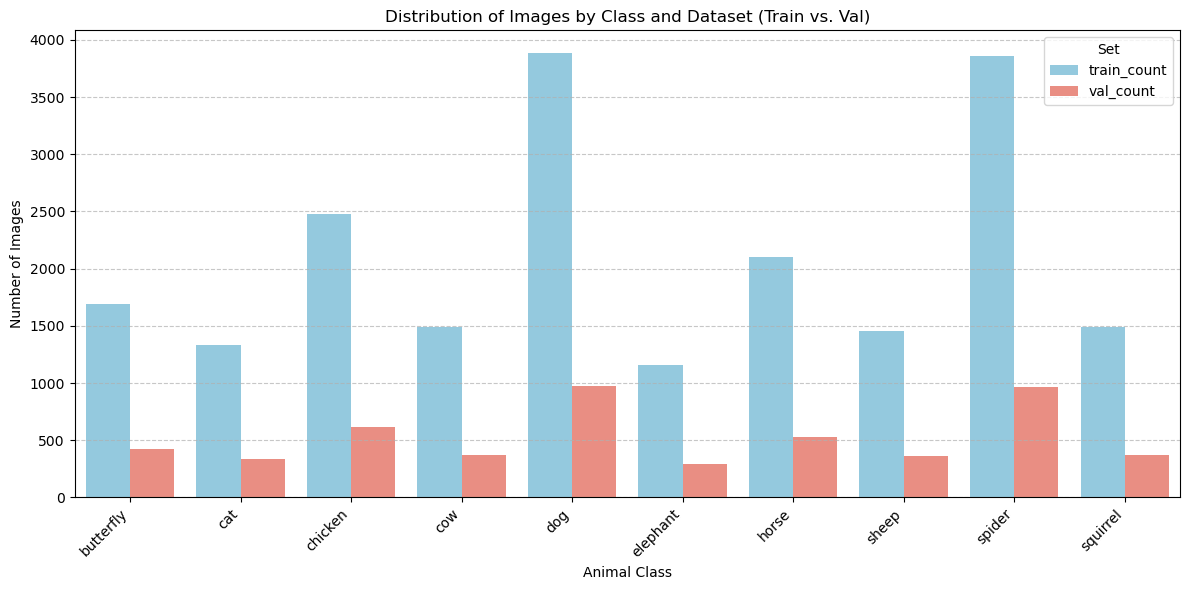

In [2]:
if df_stats is not None:
    plt.figure(figsize=(12, 6))
    
    # Use melt for easier visualization
    df_plot = df_stats.melt(id_vars='class_name', value_vars=['train_count', 'val_count'],
                            var_name='Set', value_name='Count')
    
    sns.barplot(x='class_name', y='Count', hue='Set', data=df_plot,
                palette={'train_count': 'skyblue', 'val_count': 'salmon'})
    
    plt.title('Distribution of Images by Class and Dataset (Train vs. Val)')
    plt.xlabel('Animal Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Visualization is not possible.")

3. Checking the Balance of Sets (80/20)
Let's check whether the division into 80% (training) and 20% (validation) was performed correctly.

In [3]:
if df_stats is not None:
    # Calculate the percentage for the training set
    df_stats['train_ratio'] = df_stats['train_count'] / df_stats['total_count'] * 100
    
    # Display the results
    print("\nChecking Train / Total ratio:")
    print("-" * 50)
    print(df_stats[['class_name', 'train_ratio']].round(2).to_markdown(index=False))

    # Overall balance
    total_train = df_stats['train_count'].sum()
    total_val = df_stats['val_count'].sum()
    total_all = total_train + total_val
    
    print(f"\nTotal number of images: {total_all}")
    print(f"Images in Train: {total_train} ({total_train/total_all*100:.2f}%)")
    print(f"Images in Val: {total_val} ({total_val/total_all*100:.2f}%)")
else:
    print("Balance check is not possible.")



Checking Train / Total ratio:
--------------------------------------------------
| class_name   |   train_ratio |
|:-------------|--------------:|
| butterfly    |         79.96 |
| cat          |         79.95 |
| chicken      |         79.99 |
| cow          |         79.96 |
| dog          |         79.99 |
| elephant     |         80    |
| horse        |         80.02 |
| sheep        |         80    |
| spider       |         79.98 |
| squirrel     |         79.97 |

Total number of images: 26174
Images in Train: 20935 (79.98%)
Images in Val: 5239 (20.02%)


4. Visualizing Sample Images
We visualize one random image from each class to check the quality and content.

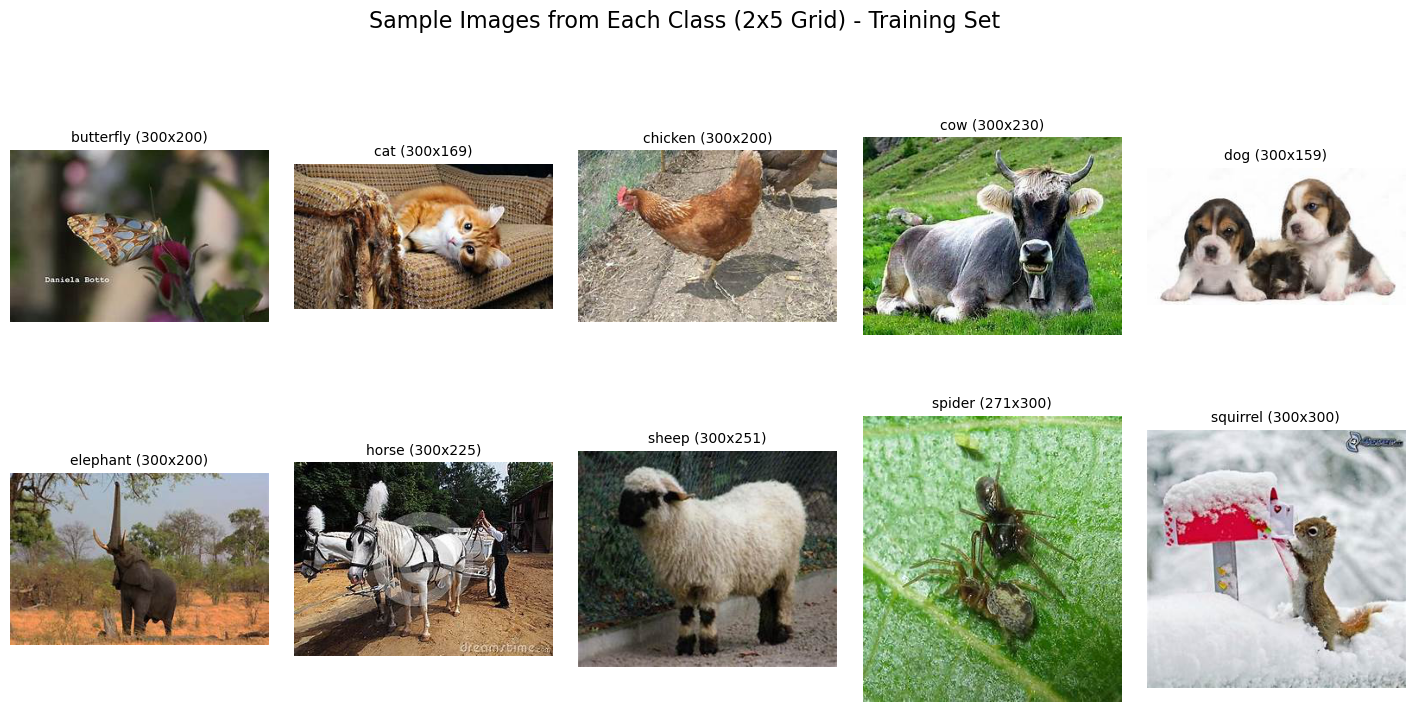

In [5]:
if df_stats is not None:
    # Get the list of detected classes
    EXPECTED_CLASSES = df_stats['class_name'].tolist()
    TRAIN_PATH = os.path.join(DATA_DIR, 'train')

    if not EXPECTED_CLASSES:
        print("Error: No classes found to display.")
    else:
        plt.figure(figsize=(18, 8))  # Increase width for better visualization of 5 columns

        # Grid: 2 rows, 5 columns (assuming 10 classes)
        ROW_COUNT = 2
        COL_COUNT = 5

        # Limit the number of displayed classes to fit into the 2x5 grid
        classes_to_show = EXPECTED_CLASSES[:ROW_COUNT * COL_COUNT] 

        for i, class_name in enumerate(classes_to_show):
            class_path = os.path.join(TRAIN_PATH, class_name)
            
            # 1. Check if the folder exists
            if not os.path.isdir(class_path):
                print(f"Skipped: Folder for class '{class_name}' does not exist or is not a directory: {class_path}")
                continue

            # 2. Find image files (supports jpg, jpeg, png)
            # Use case-insensitive search for extensions
            image_files = glob.glob(os.path.join(class_path, '*.[jp][pn][jpe]g'))
            image_files.extend(glob.glob(os.path.join(class_path, '*.[jp][pn][jpe]g'.upper()))) 
            
            if not image_files:
                print(f"Skipped: No image files found in folder '{class_name}' ({class_path}).")
                continue
                
            # 3. Select a random image
            img_path = random.choice(image_files)
            
            try:
                img = Image.open(img_path)
                
                # Create subplot (i + 1, since indexing starts from 1)
                plt.subplot(ROW_COUNT, COL_COUNT, i + 1)
                plt.imshow(img)
                plt.title(f"{class_name} ({img.size[0]}x{img.size[1]})", fontsize=10)
                plt.axis('off')
                
            except Exception as e:
                # If the image cannot be opened/read
                plt.subplot(ROW_COUNT, COL_COUNT, i + 1)
                plt.title(f"Error: {class_name}", color='red', fontsize=10)
                plt.axis('off')
                print(f"Error while processing image for {class_name}: {e}")
                continue

        plt.suptitle("Sample Images from Each Class (2x5 Grid) - Training Set", fontsize=16)

        # Adjust spacing to avoid title overlap
        plt.subplots_adjust(top=0.88, hspace=0.1, wspace=0.1) 
        plt.show()

else:
    print("Unable to display sample images because data statistics could not be collected.")

